## Import Modules

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Dataset

In [61]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
#Delete the column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
# Describe the stats of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Preprocessing

In [65]:
#Check for null values
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [66]:
#Display number of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

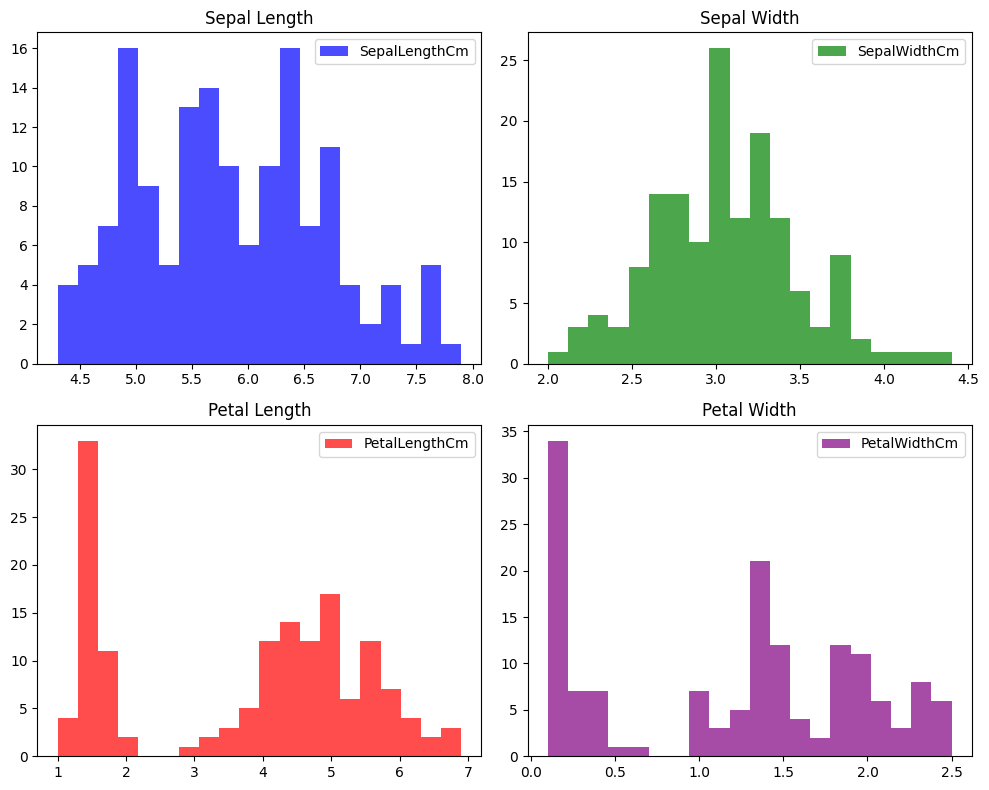

In [67]:
# Create a subplot
fig, axs = plt.subplots(2,2,figsize=(10,8))

# Plotting Histogram for the above features
axs[0, 0].hist(df['SepalLengthCm'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Sepal Length')
axs[0, 0].legend(['SepalLengthCm'])

axs[0,1].hist(df['SepalWidthCm'],bins=20,color='green',alpha=0.7)
axs[0,1].set_title('Sepal Width')
axs[0,1].legend(['SepalWidthCm'])

axs[1, 0].hist(df['PetalLengthCm'], bins=20, color='red', alpha=0.7)
axs[1, 0].set_title('Petal Length')
axs[1, 0].legend(['PetalLengthCm'])

axs[1, 1].hist(df['PetalWidthCm'], bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Petal Width')
axs[1, 1].legend(['PetalWidthCm'])

plt.tight_layout()
plt.show()

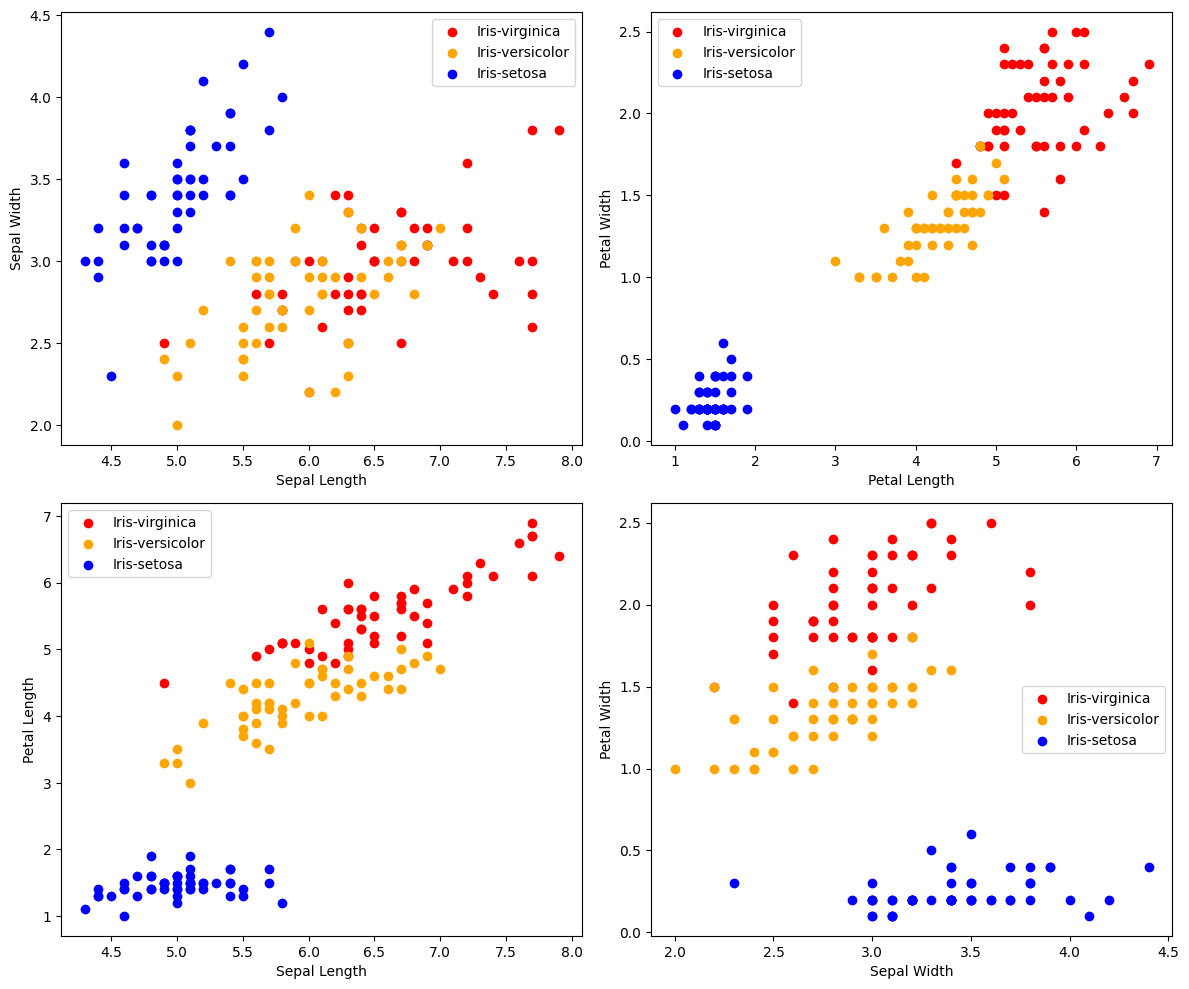

In [68]:
# scatterplots

fig, axs = plt.subplots(2,2,figsize=(12,10))
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    axs[0, 0].scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
axs[0, 0].set_xlabel("Sepal Length")
axs[0, 0].set_ylabel("Sepal Width")
axs[0, 0].legend()

for i in range(3):
    x = df[df['Species'] == species[i]]
    axs[0, 1].scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
axs[0, 1].set_xlabel("Petal Length")
axs[0, 1].set_ylabel("Petal Width")
axs[0, 1].legend()

for i in range(3):
    x = df[df['Species'] == species[i]]
    axs[1, 0].scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
axs[1, 0].set_xlabel("Sepal Length")
axs[1, 0].set_ylabel("Petal Length")
axs[1, 0].legend()

for i in range(3):
    x = df[df['Species'] == species[i]]
    axs[1, 1].scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
axs[1, 1].set_xlabel("Sepal Width")
axs[1, 1].set_ylabel("Petal Width")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Define Colors and Species
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']




## Corelation Matrix

In [69]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


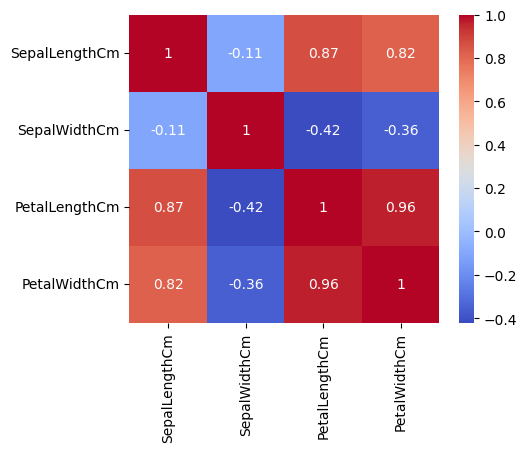

In [70]:
corr = correlation_matrix
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

## Label Encoder

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [72]:
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [73]:
# Model Training
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Species'])
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [74]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [75]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [77]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [78]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [81]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333
